# **Modeliing Unemployment Rate**

The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces. https://fred.stlouisfed.org/series/UNRATE

In [ ]:
# import libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm 


In [ ]:
# read data
unemploy=pd.read_csv('/content/UNRATE.xls')
unemploy.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [ ]:
# get to know your data 
unemploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    877 non-null    object 
 1   UNRATE  877 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.8+ KB


In [ ]:
unemploy.isna().sum()

DATE      0
UNRATE    0
dtype: int64

In [ ]:
# Convert date into date/time
unemploy['date']=pd.to_datetime(unemploy['DATE'])

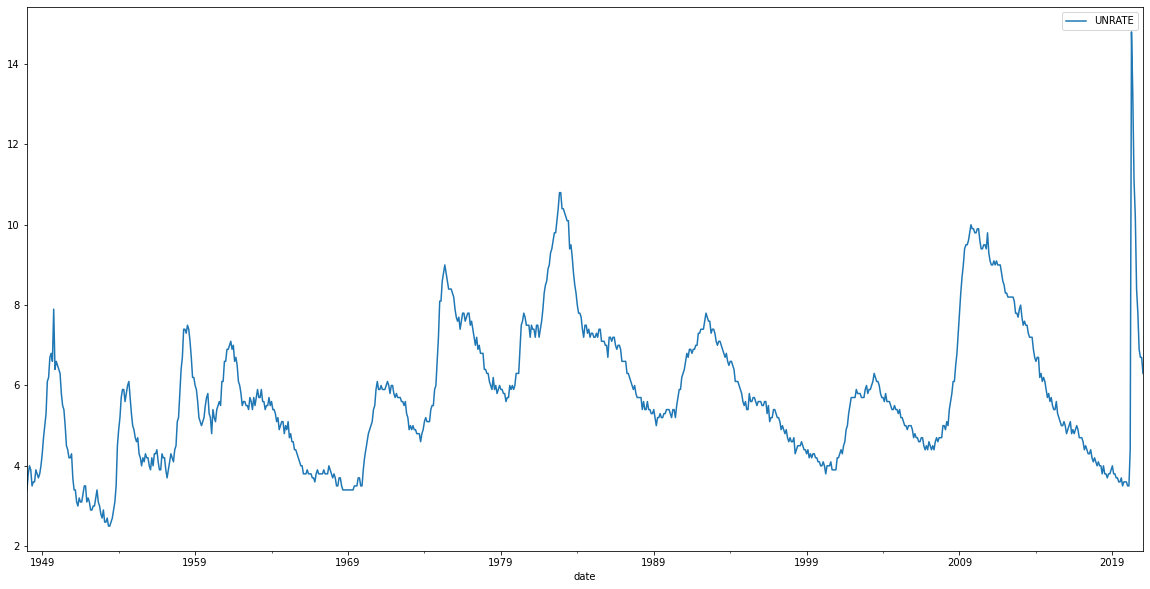

In [ ]:
# Plot data to have a generic information about it 
unemploy.plot(x='date',y='UNRATE', figsize=(20,10))

Plot the time series, along with any logical or necessary differences to get a stationary dataset.

In [ ]:
# shift and calculate the difference b/n two consecutive dates
unemploy['diff_1']=unemploy['UNRATE']-unemploy['UNRATE'].shift()

,DATE,UNRATE,date,diff_1
0,1948-01-01,3.4,1948-01-01,NaN
1,1948-02-01,3.8,1948-02-01,0.4
2,1948-03-01,4.0,1948-03-01,0.2
3,1948-04-01,3.9,1948-04-01,-0.1
4,1948-05-01,3.5,1948-05-01,-0.4
...,...,...,...,...
872,2020-09-01,7.8,2020-09-01,-0.6
873,2020-10-01,6.9,2020-10-01,-0.9
874,2020-11-01,6.7,2020-11-01,-0.2
875,2020-12-01,6.7,2020-12-01,0.0


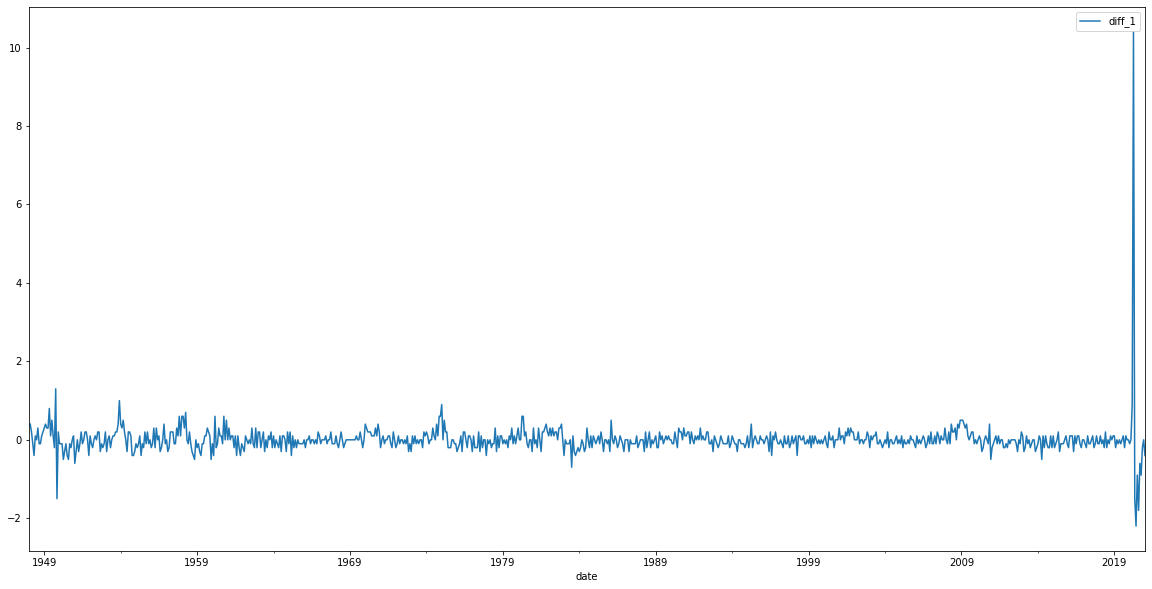

In [ ]:
unemploy.plot(x='date', y='diff_1',figsize=(20,10))

In [ ]:
adf_test = sm.tsa.stattools.adfuller(unemploy['diff_1'][1:])
results = pd.Series(adf_test[0:4], index=['ADF Test Statistic', 'P-Value', '# Lags Used', '# Observations Used'])

for key, value in adf_test[4].items():
  results[f'Critical Value {key}'] = value

results

ADF Test Statistic     -21.263518
P-Value                  0.000000
# Lags Used              1.000000
# Observations Used    874.000000
Critical Value 1%       -3.437854
Critical Value 5%       -2.864853
Critical Value 10%      -2.568534
dtype: float64

Generate and interpret a PACF for the time series (and/or its differences).

Text(0.5, 1.0, 'UNRATE diff PACF')

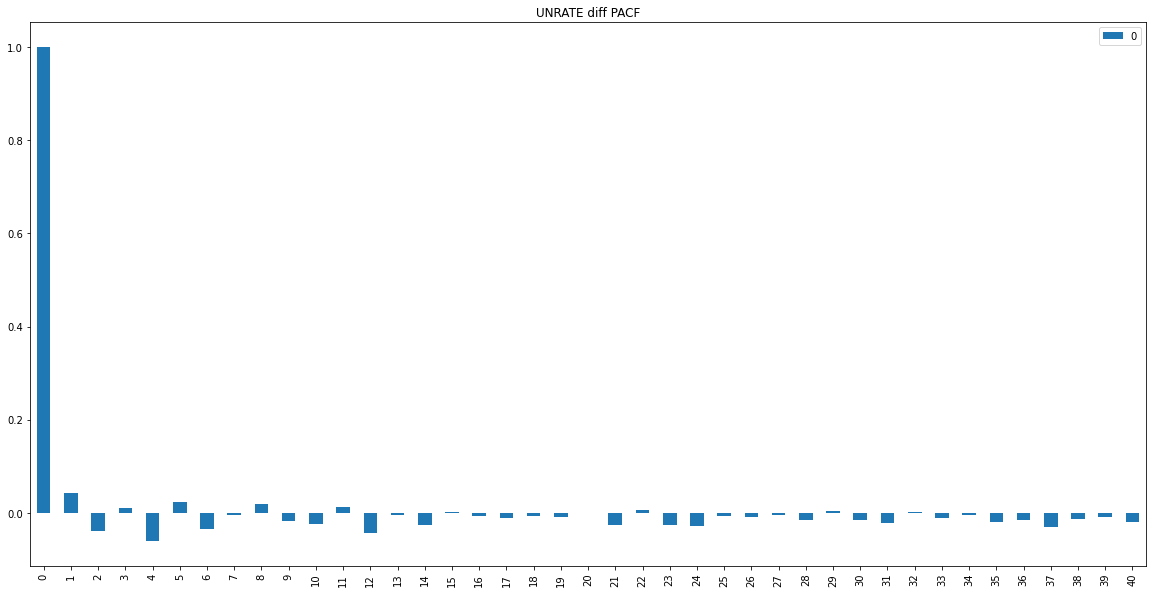

In [ ]:
pacf_df=pd.DataFrame(pacf(unemploy.diff_1[1:]))
pacf_df.plot(kind='bar', figsize=(20,10))
plt.title('UNRATE diff PACF')

Generate five ARIMA specifications and evaluate their efficacy at modeling your data. 

ARIMA 1:

In [ ]:
model=ARIMA(unemploy['UNRATE'],order=(1,0,1))
model_fit=model.fit()
print(model_fit.summary())
print('Residual description'+'\n'+'____________________')
print (model_fit.resid)

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  877
Model:                     ARMA(1, 1)   Log Likelihood                -488.642
Method:                       css-mle   S.D. of innovations              0.422
Date:                Fri, 12 Feb 2021   AIC                            985.284
Time:                        19:10:53   BIC                           1004.390
Sample:                             0   HQIC                           992.591
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7115      0.419     13.619      0.000       4.890       6.533
ar.L1.UNRATE     0.9650      0.009    106.783      0.000       0.947       0.983
ma.L1.UNRATE     0.0634      0.036      1.77

ARIMA 2:

In [ ]:
model=ARIMA(unemploy['UNRATE'],order=(1,1,0))
model_fit=model.fit()
print(model_fit.summary())
print('Residual description'+'\n'+'____________________')
print (model_fit.resid)

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  876
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -494.349
Method:                       css-mle   S.D. of innovations              0.425
Date:                Fri, 12 Feb 2021   AIC                            994.697
Time:                        19:11:15   BIC                           1009.023
Sample:                             1   HQIC                          1000.177
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0033      0.015      0.221      0.825      -0.026       0.033
ar.L1.D.UNRATE     0.0420      0.034      1.243      0.214      -0.024       0.108
                                    

ARIMA 3:

In [ ]:
model=ARIMA(unemploy['UNRATE'],order=(1,1,1))
model_arima_fit=model.fit()
print(model_fit.summary())
print('Residual description'+'\n'+'____________________')
print (model_fit.resid)

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  876
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -494.349
Method:                       css-mle   S.D. of innovations              0.425
Date:                Fri, 12 Feb 2021   AIC                            994.697
Time:                        19:11:37   BIC                           1009.023
Sample:                             1   HQIC                          1000.177
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0033      0.015      0.221      0.825      -0.026       0.033
ar.L1.D.UNRATE     0.0420      0.034      1.243      0.214      -0.024       0.108
                                    

ARIMA 4:

In [ ]:
model=ARIMA(unemploy['UNRATE'],order=(2,1,2))
model_fit=model.fit()
print(model_fit.summary())
print('Residual description'+'\n'+'____________________')
print (model_fit.resid)

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  876
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -486.107
Method:                       css-mle   S.D. of innovations              0.421
Date:                Fri, 12 Feb 2021   AIC                            984.215
Time:                        19:11:45   BIC                           1012.867
Sample:                             1   HQIC                           995.174
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0020      0.002      1.288      0.198      -0.001       0.005
ar.L1.D.UNRATE     0.1971      0.164      1.200      0.230      -0.125       0.519
ar.L2.D.UNRATE     0.7434      0.160

ARIMA 5:

In [ ]:
model=ARIMA(unemploy['UNRATE'],order=(5,1,5))
model_fit_505=model.fit()
print(model_fit.summary())
print('Residual description'+'\n'+'____________________')
print (model_fit.resid)

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  876
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -486.107
Method:                       css-mle   S.D. of innovations              0.421
Date:                Fri, 12 Feb 2021   AIC                            984.215
Time:                        19:12:02   BIC                           1012.867
Sample:                             1   HQIC                           995.174
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0020      0.002      1.288      0.198      -0.001       0.005
ar.L1.D.UNRATE     0.1971      0.164      1.200      0.230      -0.125       0.519
ar.L2.D.UNRATE     0.7434      0.160

Text(0.5, 1.0, 'Residuals')

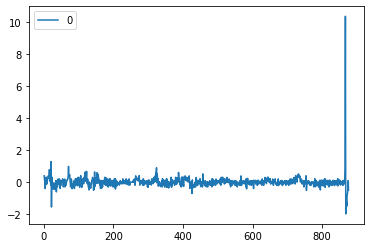

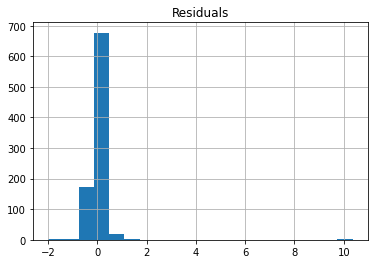

In [ ]:
residuals=pd.DataFrame(model_arima_fit.resid)
residuals.plot()
residuals.hist(bins=20)
plt.title('Residuals')

Text(0.5, 1.0, 'Residuals')

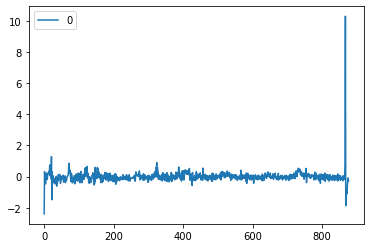

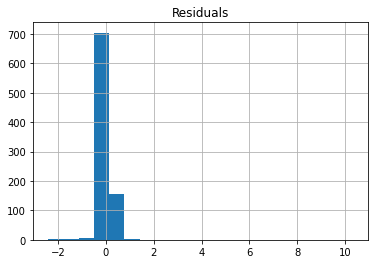

In [ ]:
residuals=pd.DataFrame(model_fit_505.resid)
residuals.plot()
residuals.hist(bins=20)
plt.title('Residuals')

This should come in the form of a Notebook with descriptions that explain your process. Remember to use text, visuals, and analysis to tell a clear and concise story with your data.

**Finally, choose one specification and make a case for it as a logical model for your dataset.**



We can compare the ARIMA specifications with different orders. For this example, we can take AIC as evaluation method, where values are as follows:

ARIMA 1-> order= 1,0,1 ------------ AIC = 985.2

ARIMA 1-> order= 1,1,0 ------------ AIC = 994.6

ARIMA 1-> order= 1,1,1 ------------ AIC = 994.6

ARIMA 1-> order= 2,1,2 ------------ AIC = 984.2

ARIMA 1-> order= 5,1,5 ------------ AIC = 993.6


** Based on the above AIC result ARIMA with order= (2,1,2) performs better than the others.

** These steps can be considered as initial stpes to conducte a univariate TSA to explore ways to fit a model that can be used to forcaset the unemployement rate into the future.